# Neural Networks as real-valued circuits

**Single Gate in Circuit**

In [227]:
def forwardMultiplyGate(x,y):
    "Takes two real-valued inputs and computes x * y with the * gate"
    
    return x * y
forwardMultiplyGate(-2,3)

-6

1.Circuit has been provided with specific input values (-2,3)

2.The circuit computes an output value (-6)

**3.How tweak input slightly to increase output ?**

options :

    a) Numerical gradient
    b) Analytical gradient

**Numerical gradient (derivative)**

\begin{equation}
  \frac{\partial f(x,y)}{\partial x} = \frac{f(x+h,y )  - f(x,y)}{h}
\end{equation}

In [228]:
# input
x, y = -2, 3
# infinitesimal
h = 0.00001

out = forwardMultiplyGate(x,y)

#calculate derivate with respect to x
xph = x + h

out2 = forwardMultiplyGate(xph,y)

x_derivative =  (out2 - out) / h

#calculate derivative with respect to y
yph = y + h

out3 = forwardMultiplyGate(yph,x)

y_derivative = (out3 - out) / h

print('Derivative with respect to x is {0} \nDerivative with respect to y is {1}'.format(x_derivative,y_derivative))

Derivative with respect to x is 3.000000000064062 
Derivative with respect to y is -2.0000000000131024


In [229]:
step_size = 0.01

x +=  step_size * x_derivative

y += step_size * y_derivative

out_new = forwardMultiplyGate(x,y)

print('Change of inputs by derivative to  \nx = {}, y = {} \nleads to increased output\noutput = {}'.format(x,y,out_new))

Change of inputs by derivative to  
x = -1.9699999999993594, y = 2.979999999999869 
leads to increased output
output = -5.870599999997832


**Numerical gradient is computationally expensive, because we need to compute circuit output as we tweak every input value independently by small amount.**

**So complexity of evaluating gradient is linear to number of inputs**

**Not practically usable to evaluate bigger and more mathematically complex networks**

**Only gives approximations of gradient**

**Analytical Gradient**

\begin{equation}
\frac{\partial f(x,y)}{\partial x} = \frac{f(x+h,y) - f(x,y)}{h}
= \frac{(x+h)y - xy}{h}
= \frac{xy + hy - xy}{h}
= \frac{hy}{h}
= y
\end{equation}

**Gives exact gradient**

**Only one pass-through**


In [230]:
x, y = -2, 3

out = forwardMultiplyGate(x, y)

x_gradient,y_gradient = y,x

step_size = 0.01

x +=  step_size * x_derivative

y += step_size * y_derivative

out_new = forwardMultiplyGate(x,y)

print('Change of inputs by derivative to  \nx = {}, y = {} \nleads to increased output\noutput = {}'.format(x,y,out_new))

Change of inputs by derivative to  
x = -1.9699999999993594, y = 2.979999999999869 
leads to increased output
output = -5.870599999997832


**In practice, NN libraries computes analytical gradient, but verifies implementation by comparing it to the numerical gradient**

**Numerical gradient is expensive to compute, but easy to evaluate** 

vs. 

**Analytical gradient is efficient to compute, but may contain bugs at times**




**Recursive case : Circuits with multiple gates**

In [231]:
def forwardAddGate(a,b):
    return a + b

def forwardMultiplyGate(a,b):
    return a * b

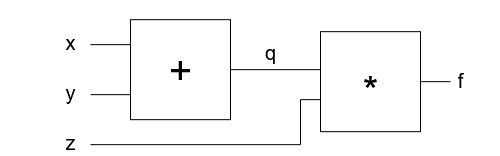

\begin{equation}
f(x,y,z) = (x + y) z
\end{equation}

\begin{equation}
f(q,z) = q z \hspace{0.5in} \implies \hspace{0.5in} \frac{\partial f(q,z)}{\partial q} = z, \hspace{1in} \frac{\partial f(q,z)}{\partial z} = q
\end{equation}

\begin{equation}
q(x,y) = x + y \hspace{0.5in} \implies \hspace{0.5in} \frac{\partial q(x,y)}{\partial x} = 1 \hspace{1in} \frac{\partial q(x,y)}{\partial y} = 1
\end{equation}

In [232]:
def forwardCircuit(x,y,z):
    
    q = forwardAddGate(x,y)
    f = forwardMultiplyGate(q,z)
    
    return f 

x, y, z = -2, 5, -4


f = forwardCircuit(x,y,z)
f

-12

**Backpropagation**

- use chain rule to compute gradient with respect to x and y
    - Chain Rule:
\begin{equation}
f(x) = h(g(x))
\end{equation}

\begin{equation}
f'(x)= h'(g(x)) \, g'(x)
\end{equation}


In [233]:
#initial conditions

x, y, z = -2, 5, -4

q = forwardAddGate(x,y)

f = forwardMultiplyGate(q,z)

#gradient of the multiply gate with respect to its inputs

derivative_f_wrt_z = q
derivative_f_wrt_q = z

#derivative of ADD gate with respect to its inputs

derivative_q_wrt_x = 1
derivative_q_wrt_y = 1

#chain rule
derivative_f_wrt_x = derivative_q_wrt_x * derivative_f_wrt_q
derivative_f_wrt_y = derivative_q_wrt_y * derivative_f_wrt_q

derivative_f_wrt_x,derivative_f_wrt_y

(-4, -4)

\begin{equation}
\frac{\partial f(q,z)}{\partial x} = \frac{\partial q(x,y)}{\partial x} \frac{\partial f(q,z)}{\partial q}
\end{equation}

In [234]:
#final gradient
gradient_wtr_xyz = [derivative_f_wrt_x,derivative_f_wrt_y,derivative_f_wrt_z]
gradient_wtr_xyz

[-4, -4, 3]

In [235]:
# let inputs respond to the force/tug
step_size = 0.01

x = x + step_size * derivative_f_wrt_x

y = y + step_size * derivative_f_wrt_y

z = z + step_size * derivative_f_wrt_z

#Check if circuits improved
q = forwardAddGate(x,y)

f = forwardMultiplyGate(q,z)

out_new = forwardCircuit(x,y,z)

print('New inputs are x = {}(ov = 2),y = {}(ov = 5),z = {}(ov = -4) and theirs output is {}'.format(x,y,z,out_new))

New inputs are x = -2.04(ov = 2),y = 4.96(ov = 5),z = -3.97(ov = -4) and theirs output is -11.5924


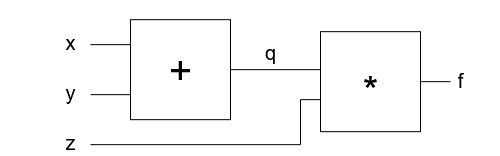

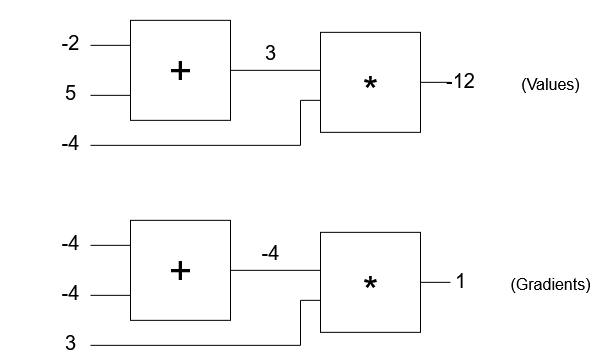

**Numerical gradient check**

In [236]:
# initial conditions
x, y, z = -2, 5, -4

#numerical gradient check
h = 0.0001

x_derivative = (forwardCircuit(x+h,y,z) - forwardCircuit(x,y,z)) / h

y_derivative = (forwardCircuit(x,y+h,z) - forwardCircuit(x,y,z)) / h

z_derivative = (forwardCircuit(x,y,z + h) - forwardCircuit(x,y,z)) / h

num_gradient = [x_derivative,y_derivative,z_derivative]

print('Numerical gradient check outputs:\nDerivative of x = {}\nDerivative of y = {}\nDerivative of z = {}'
      .format(num_gradient[0],num_gradient[1],num_gradient[2]))


#check if it is same as analytical gradient computed with backpropagation
check = gradient_wtr_xyz == [round(gradient) for gradient in num_gradient]
print('Check if numerical gradient is equal to analytical gradient computed by backpropagation:\n{}'.format(check))

Numerical gradient check outputs:
Derivative of x = -3.9999999999906777
Derivative of y = -3.9999999999906777
Derivative of z = 3.000000000010772
Check if numerical gradient is equal to analytical gradient computed by backpropagation:
True


**Example ; Single Neuron**

Consider 2-dimensional neuron that computes following function:

\begin{align}
f(x,y,a,b,c) = \sigma(ax + by + c )
\end{align}

In this expression, $\sigma$ is sigmoid function that squashes its input between 0 and 1. Very negative values are squashed towards 0 and positive values towards 1.

Sigmoid function is defined as :

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}

and its gradient is:
\begin{equation}
\frac{\partial \sigma(x)}{\partial x} = \sigma(x) (1 - \sigma(x))
\end{equation}

In [237]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

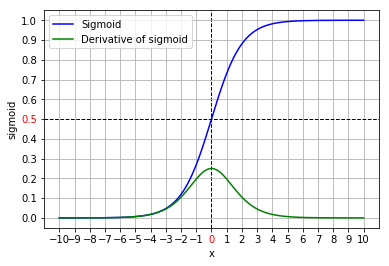

In [238]:
sigmoid_f = lambda x : 1/(1+np.exp(-x))
sigmoid_gradient = lambda x : sigmoid_f(x)*(1-sigmoid_f(x))

x = np.linspace(-10,10,500)
fig, ax = plt.subplots()
#ax.set_xticks(, minor=False)
ax.set_yticks(np.arange(0,1.1,step = 0.1))
ax.set_xticks(range(-10,11), minor=False)
plt.plot(x,sigmoid_f(x),'b',label = 'Sigmoid')
plt.plot(x,sigmoid_gradient(x),'g',label = 'Derivative of sigmoid')
plt.legend(loc="best")
x_middle = len(ax.get_xticklabels())//2
ax.get_xticklabels()[x_middle].set_color("red")
ax.get_yticklabels()[5].set_color("red")
ax.get_ygridlines()[5].set_linewidth(1)
ax.get_ygridlines()[5].set_color('black')
ax.get_ygridlines()[5].set_linestyle('dashed')
ax.get_xgridlines()[x_middle].set_linewidth(1)
ax.get_xgridlines()[x_middle].set_color('black')
ax.get_xgridlines()[x_middle].set_linestyle('dashed')
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.grid(True)
plt.show()



In [452]:
#Every unit corresponds to a wire in the diagrams (connections between neurons)
class Unit(object):
    """Stores value carried during forward pass and gradient that flows back through it in backward pass"""
    def __init__(self,value,grad):
        # value computed in the forward pass
        self.value = value
        # derivative of circuit output with respect to (w.r.t.) this unit, computed in backward pass
        self.grad = grad
    def __str__(self):
            return 'Value ={} Gradient = {}'.format(self.value,self.grad)

In [453]:
class multiplyGate(object):
        def forward(self,u0,u1):
            'Store pointers to input Units u0 and u1 and outputs unit utop'
            self.u0 = u0
            self.u1 = u1
            self.utop = Unit(u0.value * u1.value,0.0)
            return self.utop
    
        def backward(self):
            """Takes the gradient in output unit and chain it with the local gradients,
            which we derived from multiplyGate before"""
            self.u0.grad += self.u1.value * self.utop.grad
            self.u1.grad += self.u0.value * self.utop.grad
        

In [454]:
class addGate(object):
    def forward(self,u0,u1):
        self.u0 = u0
        self.u1 = u1
        self.utop = Unit(u0.value + u1.value,0.0)
        return self.utop
    
    def backward(self):
        """Add gate derivative w.r.t to its inputs (derivative = 1)"""
        self.u0.grad += 1 * self.utop.grad
        self.u1.grad += 1 * self.utop.grad

In [455]:
class sigmoidGate(object):
    
    def __init__(self):
        self.sigmoid = lambda x : (1 / (1 + np.exp(-x)))
        
    def forward(self,u0):
        self.u0 = u0
        self.utop = Unit(self.sigmoid(self.u0.value), 0.0)
        return self.utop
    
    def backward(self):
        sig = self.sigmoid(self.u0.value)
        self.u0.grad += (sig * (1 - sig)) * self.utop.grad

In [325]:
#create input units
a = Unit(1.0,0.0)
b = Unit(2.0,0.0)
c = Unit(-3.0,0.0)
x = Unit(-1.0,0.0)
y = Unit(3.0,0.0)

#create gates
mulg0 = multiplyGate()
mulg1 = multiplyGate()
addg0 = addGate()
addg1 = addGate()
sg0 = sigmoidGate()



#forward pass

def forwardNeuron():
    global s,ax,by,axpby,axpbypc
    ax = mulg0.forward(a,x) # a*x = -1
    by = mulg1.forward(b,y) # b*y = 6
    axpby = addg0.forward(ax,by) # a*x + b*y =5
    axpbypc = addg1.forward(axpby,c) # a*x + b*y + c = 2
    s = sg0.forward(axpbypc) # sigmoid(a*x + b*y + c) = 0.88

forwardNeuron()    
print('Circuit output:{}'.format(s))

Circuit output:Value =0.8807970779778823 Gradient = 0.0


In [326]:
#Compute gradient
s.grad = 1.0 # Sets gradient of the last unit to be 1.0, 
             #if it was not all gradients would be computed as zero due to multiplication in chain rule

sg0.backward()
addg1.backward()
addg0.backward()
mulg1.backward()
mulg0.backward()

print(a)
gradients_backprop = [a.grad,b.grad,c.grad,x.grad,y.grad]

Value =1.0 Gradient = -0.10499358540350662


In [327]:
#Change inputs in response to the computed gradients

step_size = 0.01
a.value += step_size * a.grad
b.value += step_size * b.grad
c.value += step_size * c.grad
x.value += step_size * x.grad
y.value += step_size * y.grad

forwardNeuron()
print('Circuit output:{}'.format(s))

Circuit output:Value =0.8825501816218984 Gradient = 0.0


In [328]:
#Check correctnes of backpropagation by checking numerical gradient

def forwardCircuitFast(a,b,c,x,y):
    return 1 / (1 + np.exp( - (a*x + b*y +c)))

a, b, c, x, y = 1, 2, -3, -1, 3
h = 0.0001

a_grad = (forwardCircuitFast(a + h,b,c,x,y) - forwardCircuitFast(a,b,c,x,y)) / h
b_grad = (forwardCircuitFast(a,b + h,c,x,y) - forwardCircuitFast(a,b,c,x,y)) / h
c_grad = (forwardCircuitFast(a,b,c + h,x,y) - forwardCircuitFast(a,b,c,x,y)) / h
x_grad = (forwardCircuitFast(a,b,c,x + h,y) - forwardCircuitFast(a,b,c,x,y)) / h
y_grad = (forwardCircuitFast(a,b,c,x,y + h) - forwardCircuitFast(a,b,c,x,y)) / h

num_gradient_2 = [a_grad,b_grad,c_grad,x_grad,y_grad]

#check if it is same as analytical gradient computed with backpropagation
check = [round(gradient) for gradient in gradients_backprop] == [round(gradient) for gradient in num_gradient_2]
print('Check if numerical gradient is equal to analytical gradient computed by backpropagation:\n{}'.format(check))
print(gradients_backprop)
print(num_gradient_2)

Check if numerical gradient is equal to analytical gradient computed by backpropagation:
True
[-0.10499358540350662, 0.31498075621051985, 0.10499358540350662, 0.10499358540350662, 0.20998717080701323]
[-0.10499758359205913, 0.3149447748351797, 0.10498958734506125, 0.10498958734506125, 0.2099711788272618]


**Backpropagation practice**

In [329]:
dx = 1.0

x = a * b
da = b * dx
db = a * dx

In [330]:
x = a + b
da = 1.0 * dx
db = 1.0 * dx

In [331]:
#lets compute  x = (a + b + c) in two steps
q = a + b #gate 1
x = q + c #gate 2

dc = 1.0 * dx #backprop gate 2
dq = 1.0 * dx

da = 1.0 * dq #backprop gate 1
db = 1.0 * dq

In [332]:
x = a + b + c

da = 1.0 * dx
db = 1.0 * dx
dc = 1.0 * dx

In [333]:
x = a * b + c

da = b * dx
db = a * dx
dc = 1.0 * dx

q = a * b

x = q + c

dq = da * db

In [334]:
# neuron in two steps
sigmoid = lambda x : (1 / (1 + np.exp(-x)))

q = a * x + b*y + c
f = sigmoid(q)

#now backward pass, we are given df and:
df = 1
dq = (f* (1-f))*df
#now chain it to its inputs
da = x * dq
dx = a * dq
db = y * dq
dy = b * dq
dc = 1 * dq

In [335]:
x = a * a # value a is flowing into multiplyGate, but it gets split and it both become inputs and backward flow 
          # of gradients always adds up

da  = a * dx # gradient from first branch
da += a * dx # now add gradient from second branch

#short form

da = 2 * a * dx

$f(a) = a^2$

its derivative (power rule) : 
$\frac{\partial f(a)}{\partial a} = 2a$ 

which is exactly same as being two inputs to a gate

In [336]:
x = a*a + b*b + c*c

da = 2*a * dx
db = 2*b * dx
dc = 2*c * dx

In [337]:
d = 2

x = np.power(((a * b + c) * d),2)

In [338]:
#split expression into manageable chunks of simpler expressions and then chain them with chain rule
x1 = a * b + c
x2 = x1 * d
x = x2 * x2

#now we go backwards in backprop

dx2 = 2 * x2 * dx #backprop into x2
dd = x1 * dx2     #backprop into d
dx1 = d * dx2    #backprop into x1
da = b * dx1
db = a * dx1
dc = 1.0 * dx1

In [339]:
x = 1.0/a #division
da = -1.0 /(a*a)

In [340]:
x = (a + b)/(c + d)
#decompose into simpler expressions
x1 = a + b
x2 = c + d
x3 = 1.0 / x2 
x = x1 * x3 # equivalent to above
#backpropagation (dont forget reverse order)

dx1 = x3 * dx
dx3 = x1 * dx
dx2 = (-1.0 / (x2*x2)) * dx3 #local gradient as shown above, and chain rule
da = 1.0 * dx1
db = 1.0 * dx1
dc = 1.0 * dx2
dd = 1.0 * dx2


**Process:**

- Break down expressions
- do the forward pass
- for every variable derive its gradient as we go backwards one by one ,apply local gradient and chain them together

In [352]:
x = lambda a,b : np.maximum(a,b) # maximum function passes on the value of the largest input and ignores the other ones
                    # gate acts as simple switch, based on which input had the highest value during forward pass
                    # other inputs will have zero gradient

da = lambda x : 1.0 * dx if a == x else 0.0
db = lambda x : 1.0 * dx if b == x else 0.0


In [353]:
#ReLu - Rectified Linear unit
x = np.maximum(a,0)
da = lambda x : 1.0 * dx if a > 0 else 0.0

#gate passes value through if its larger than 0 , or stops the flow and sets it to zero 
#In the backward pass the gate will pass on the gradient from top if it was activated during forward pass,
# or if the original input was below zero , it will stop the gradient flow

**Conclusion:**

- We can feed some input through arbitrarily complex real-valued circuit 
- Tug at the end of circuit with some force
- Backpropagation will distribute that tug through entire circuit all the way back to inputs
   



# Machine Learning

**Binary Classification**


Simple linear classifier:

$f(x, y) = ax + by + c$

$c =$ bias term

$x$ and $y$ are inputs(2-D vector) and $a,b,c$ are parameters of function that we want to learn.

Process of Stochaistic Gradient Descent on Neural Networks:

- 1. Select random datapoint and feed it through the circuit
- 2. We will interpret the output of the circuit as a confidence that the datapoint has class +1 
    - i.e. very high values = circuit is very certain datapoint has class +1, and very low values = circuit is certain that datapoint has class -1

- 3. We will measure how well the prediction alligns with the provided labels.
        - Intuitively, for example, if a positive example scores very low, we will want to tug in into positive direction on the circuit, demanding that it should output higher value for this datapoint.
- 4. The circuit will take the tug and backpropagate it to compute tugs on the inputs $a, b, c, x, y$
- 5. Since we thinkg of $x,y$ as fixed datapoints, we will ignore the pull on $x,y$
- 6. On the other hand , we will take the parameters a,b,c and make them respond to their tug (we will perform parameter update). This will make it so that circuit will output slightly higher score on this particular datapoint in the future
- 7. Iterate! Go back to step 1.
        
**As far as circuit is concerned, $a,b,c,x,y$ are all made up of the same stuff**
- However, after the backward pass is complete , we ignore all changes on datapoints $x,y$ and keep swapping them in and out as we iterate over examples in the dataset
- On the other hand, we keep parameters $a,b,c$ around and keep tugging on them every time we sample a datapoint.
- Over time, the pulls on these parameters will tune these values in such way, that the function outputs high scores for positive examples and low scores for negative examples.


**Learning a Support Vector Machine**

Support Vector Machine "Force Specification"

- If we feed a positive datapoint through the SVM circuit, and the output value is less then $1$, pull on the circuit with force $+1$.This is positive example, so we want the score to be higher for it.
- Conversely, if we feed it a negative datapoint through the SVM circuit, and the output value is greater then $-1$, then the circuit is giving then the circuit is giving datapoint dangerously high score >> Pull on the circuit downwards with force $-1$
- In addition to the pulls above, always add a small amount of pull on the parameters $a,b$(not on $c$!), that pulls them towards zero. You can think of both $a,b$ as being attached to physical spring that is attached at zero. Just as with physical spring, this will make the pull proportional to the value of each $a,b$. For example if $a$ becomes very high, it will experience a strong pull of magnitude $|a|$ back towards zero. This pull is **Regularization** and it ensures that neither of our parameters gets disproportionally large.
    - This would be undesirable because both $a,b$ gets multiplied to the input features $x,y$, so if either of them is too high, our classifier would be overly sensitive to this features. This is not nice property, because features can be often noisy in practice, so we want our classifier to change relatively smoothly if they wiggle around.


Concrete example

vector   -> label

[1.2, 0.7] -> +1

[-0.3, 0.5] -> -1

[-3, -1] -> +1

[0.1, 1.0] -> -1

[3.0, 1.1] -> -1

[2.1, -3] -> +1

random parameter setting: $a = 1 ,  b = -2 ,  c = -1$

data point = $[1.2,0.7]$

SVM will compute $1 \cdot 1.2 + (-2) \cdot 0.7 - 1 = -1.2$
- this point is labeled as $+1$ in the training data , so we want the score be higher than $1$.
    - The gradient on top of the circuit will thus be positive $+1$, which will backpropagate to $a,b,c$.
    - Additionaly, there will also be reguralization pull on $a$ of $-1$ (to make it smaller) and reguralization pull on $b$ of $+2$ to make it larger, toward zero.

Supposes that instead we fed another datapoint SVM:

data point = $[-0.3,0.5]$ >>> $1 \cdot -0.3 + (-2) \cdot 0.5 - 1 = -2.3$
- Label of this datapoint is $-1$ and since $-2.3$ is smaller then $-1$,we see that according to our force specification the SVM should be happy: The computed score is very negative, consistent with the negative labe of this example.
    - There will be no pull at the end of the circuit(i.e. its zero), since there are no changes necessary
    - However, there will still be the reguralization pull on $a$ of $-1$ and on $b$ of $2$


In [650]:
#A circuit: it takes 5 Units(x,y,a,b,c) and outputs single Unit
#It can also compute gradient w.r.t. its inputs

class Circuit():
    """Computes (a*x + b*y + c) and gradient"""
    def __init__(self):
        """Create some gates"""
        self.mulg0 = multiplyGate()
        self.mulg1 = multiplyGate()
        self.addg0 = addGate()
        self.addg1 = addGate()
        
    def forward(self,x,y,a,b,c):
        self.ax = self.mulg0.forward(a,x) #a*x
        self.by = self.mulg1.forward(b,y) #b*y
        self.axpby = self.addg0.forward(self.ax,self.by) #a*x + b*y
        self.axpbypc = self.addg1.forward(self.axpby,c) # (a*x + b*y) + c
        return self.axpbypc
    
    def backward(self,gradient_top):
        """Takes pull from above"""
        self.axpbypc.grad = gradient_top
        self.addg1.backward() # sets gradient in axpby and c
        self.addg0.backward() # sets gradient in ax and by
        self.mulg1.backward() # sets gradient in b and y
        self.mulg0.backward() # sets gradient in a and x

In [669]:
class SVM():
    """SVM class"""
    def __init__(self):
        """random initial parameters"""
        self.a = Unit(1.0,0.0)
        self.b = Unit(-2.0,0.0)
        self.c = Unit(-1.0,0.0)
        
        self.circuit = Circuit()
    
    def values(self):
        return self.a.value,self.b.value,self.c.value
    
    def forward(self,x,y):
        """Expects x and y to be Units"""
        self.unit_out = self.circuit.forward(x, y, self.a, self.b, self.c)
        return self.unit_out
    
    
    def backward(self,label):
        """label is +1 or -1"""
        
        #reset pulls on a,b,c
        self.a.grad = 0.0
        self.b.grad = 0.0
        self.c.grad = 0.0
        label = label
        
        #compute the pull based on what circuit output was
        pull = 0.0
        
        if (label == 1 and self.unit_out.value < 1): 
            pull = 1  # score was too low: pull up
            
        elif (label == -1 and self.unit_out.value > -1):
            pull = -1  # score was too high for positive example : pull down
            
        self.circuit.backward(pull) # writes gradient into x,y,a,b,c
        
        #add regularization pull for parameters: towards zero and proportional to value
        self.a.grad += -self.a.value
        self.b.grad += -self.b.value

    
    def learnFrom(self,x,y,label):
        self.forward(x,y) # forward pass (set .value in all Units)
        self.backward(label) # backward pass (set .grad in all Units)
        self.parameterUpdate() # parameters responds to tug
    def parameterUpdate(self):
        step_size = 0.01
        self.a.value += step_size * self.a.grad
        self.b.value += step_size * self.b.grad
        self.c.value += step_size * self.c.grad
    

In [670]:
#Train SVM with Stochastic Gradient Descent

data, labels = [], []
data.append([1.2,0.7]);labels.append(1)
data.append([-0.3, -0.5]);labels.append(-1)
data.append([3.0, 0.1]);labels.append(1)
data.append([-0.1, -1.0]);labels.append(-1)
data.append([-1.0, 1.1]);labels.append(-1)
data.append([2.1, -3]);labels.append(1)

In [697]:
svm = SVM()

def evalTrainingAccuracy():
    """function that evaluates training accuracy"""
    
    num_correct = 0
    
    for feature,label in zip(data,labels):
        x = Unit(feature[0],0.0)
        y = Unit(feature[1],0.0)
        true_label = label
        #see if prediction matches provided label 
        predicted_label =  1 if svm.forward(x,y).value > 0 else -1
        if predicted_label == true_label:
            num_correct += 1
    return num_correct / len(data)

#learning loop
import random
import math

def learning(n_iter):
    for iteration in range(0,n_iter):
        #pick random datapoint
        i = math.floor(random.random() * len(data))
        x = Unit(data[i][0],0.0)
        y = Unit(data[i][1],0.0)
        label = labels[i]
        svm.learnFrom(x,y,label)
    
        if iteration % 25 == 0: #every 10 iterations
            print('training accuracy at iter {} : {}'.format(iteration,evalTrainingAccuracy()))
            #print('a = {}, b = {}, c = {}'.format(*svm.values()))
            
learning(400)

training accuracy at iter 0 : 0.6666666666666666
training accuracy at iter 25 : 0.6666666666666666
training accuracy at iter 50 : 0.8333333333333334
training accuracy at iter 75 : 0.8333333333333334
training accuracy at iter 100 : 0.8333333333333334
training accuracy at iter 125 : 0.8333333333333334
training accuracy at iter 150 : 0.8333333333333334
training accuracy at iter 175 : 0.8333333333333334
training accuracy at iter 200 : 0.8333333333333334
training accuracy at iter 225 : 0.8333333333333334
training accuracy at iter 250 : 0.8333333333333334
training accuracy at iter 275 : 0.8333333333333334
training accuracy at iter 300 : 0.8333333333333334
training accuracy at iter 325 : 0.8333333333333334
training accuracy at iter 350 : 0.8333333333333334
training accuracy at iter 375 : 0.8333333333333334


**Generalizing the SVM into a Neural Network**


2-layer Neural Network for binary classification

In [701]:
#assume inputs x,y

# n1 = np.maximum(0,a1*x + b1*y + c1) #activation of first hidden neuron
# n2 = np.maximum(0,a2*x + b2*y + c2) #2nd neuron
# n3 = np.maximum(0,a3*x + b3*y + c3) #3rd neuron

# score = a4*n1 +b4*n2 + c4*n3 +d4 # score

The specification above is 2-layer Neural Network with 3 hidden neurons(n1,n2,n3), that uses Rectified Linear Unit(ReLu)
            non-linearity on each hidden neuron. As you can see, there are now several parameters involved, which means that our classifier is more complex and can represent more intricate decision boundaries than just a simple linear decision rule such as SVM. Another way to think about it is that every one of three hidden neurons is a linear classifier and now we are putting an extra linear classifier on top of that

In [750]:
#random initial parameters

a1 =  random.random() - 0.5 # random number between -0.5 and 0.5
b1 =  random.random() - 0.5
c1 =  random.random() - 0.5
a2 =  random.random() - 0.5 # random number between -0.5 and 0.5
b2 =  random.random() - 0.5
c2 =  random.random() - 0.5
a3 =  random.random() - 0.5 # random number between -0.5 and 0.5
b3 =  random.random() - 0.5
c3 =  random.random() - 0.5
a4 =  random.random() - 0.5 # random number between -0.5 and 0.5
b4 =  random.random() - 0.5
c4 =  random.random() - 0.5
d4 = random.random() - 0.5

for n_iter in range(0,400):
    #pick random datapoint
    i = math.floor(random.random() * len(data))
    x = data[i][0]
    y = data[i][0]
    label = labels[i]
    
    
    #compute forward pass
    n1 = np.maximum(0,a1*x + b1*y + c1) #activation of first hidden neuron
    n2 = np.maximum(0,a2*x + b2*y + c2) #2nd neuron
    n3 = np.maximum(0,a3*x + b3*y + c3) #3rd neuron
    score = a4*n1 +b4*n2 + c4*n3 + d4 # score

    #compute the pull on top
    pull = 0.0
    pull = 1 if (label == 1 and score < 1 ) else pull  #we want higher output, Pull up
    pull = 1 if (label == -1 and score > -1 ) else pull #we want lower output, Pull down
    
    #now compute backward pass to all parameters of model
    
    #backprop through last score neuron
    dscore = pull
    da4 = n1 * dscore
    db4 = n2 * dscore
    dc4 = n3 * dscore
    dd4 = 1.0 * dscore
    
    #backprop to ReLu nonlinearities
    #i.e. just set gradients to 0 if the neurons did not "fire"
    dn3 = 0 if n3 == 0 else dn3
    dn2 = 0 if n2 == 0 else dn2
    dn1 = 0 if n1 == 0 else dn1
    
    #backprop to parameters of neuron1
    da1 = x * dn1
    db1 = y * dn1
    dc1 = 1.0 * dn1
    
    
    #backprop to parameters of neuron2
    da2 = x * dn2
    db2 = y * dn2
    dc2 = 1.0 * dn2
    
    #backprop to parameters of neuron3
    da3 = x * dn3
    db3 = y * dn3
    dc3 = 1.0 * dn3

    
    #add pulls from reguralization ,tugging all multiplicative parameters downward 
    #(i.e. not the biases) downward,proportional to their values
    da1 += -a1; da2 += -a2; da3 += -a3;
    db1 += -b1; db2 += -b2; db3 += -b3;
    da4 += -a4; db4 += -b4; dc4 += -c4;
    
    #do the parameter update
    step_size = 0.01
    
    a1 += da1 * step_size
    a2 += da2 * step_size
    a3 += da3 * step_size
    a4 += da4 * step_size
    b1 += db1 * step_size
    b2 += db2 * step_size
    b3 += db3 * step_size
    b4 += db4 * step_size
    c1 += dc1 * step_size
    c2 += dc2 * step_size
    c3 += dc3 * step_size
    c4 += dc4 * step_size
    d4 += dd4 * step_size


2-layer Neural Net: 

- we write forward pass expression
- interpret the value at the end as a score
- pull on that value in a positive or negative direction depending on what we want that value to be for our 
particular example
- parameter update after backprop will ensure that when we see this particular example in the future,the network will be more likely to give us value we desire , not the one it gave just before update

**Conventional Approach: Loss Functions**

Example: 2-D Support Vector Machine

Dataset of $N$ examples $(x_{i0}, x_{i1})$ and their corresponding target features $(y_{i})$, which are allowed to be either $+1 / -1$ for positive or negative examples respectively.

We have three weight parameters $(w_0, w_1, w_2)$

SVM loss function is defined as follows:

$$ L = [\sum_{i=1}^N max(0, -y_{i}( w_0x_{i0} + w_1x_{i1} + w_2 ) + 1 )] + \alpha [w_0^2 + w_1^2] $$

Expression is always positive, due to thresholding at zero in the first expression and the squaring in the reguralization.
The idea is that we will want this expression to be as small as possible.

In [796]:
X = [[1.2,0.7],[-0.3,0.5],[3,2.5]] # array of 2-dimensional data
y = [1,-1,1] # array of labels 
w = [0.1,0.2,0.3] # example: random numbers
alpha = 0.1 # reguralization strength

def cost(X,y,w):
    """SVM cost function"""
    
    total_cost = 0.0 #L, in SVM loss function expression above
    N = len(X)
    # loop over all data points and compute their score
    for i,feature in enumerate(X):
        score = w[0] * feature[0] + w[1] * feature[1] + w[2]
        
    # accumulate cost based on how compatible the score is with the label
        yi = y[i]
        costi = np.maximum(0,-yi * score + 1)
        print('example {}: xi = {} and label = {}'.format(i,feature,yi))
        print('score computed to be: {}'.format(round(score,3)))
        print('==> cost computed to be: {}'.format(round(costi,3)))
        total_cost += costi
    
   #reguralization cost: we want small weights

    reg_cost = alpha * (w[0] * w[0] + w[1] * w[1])
    print('reguralization cost for current model is {}'.format(round(reg_cost,3)))
    total_cost += reg_cost
    
    print('total cost is {}'.format(round(total_cost,3)))
    return total_cost   

In [797]:
cost(X,y,w)

example 0: xi = [1.2, 0.7] and label = 1
score computed to be: 0.56
==> cost computed to be: 0.44
example 1: xi = [-0.3, 0.5] and label = -1
score computed to be: 0.37
==> cost computed to be: 1.37
example 2: xi = [3, 2.5] and label = 1
score computed to be: 1.1
==> cost computed to be: 0.0
reguralization cost for current model is 0.005
total cost is 1.815


1.815

*Cost function is an expression that measures how bad is your classifier. When the training set is perfectly classified, the cost(ignoring the reguralization ) will be zero.*


**The majority of cost functions in Machine Learning consists of two parts.**
- 1. A part that measures how well model fits the data.
- 2. Reguralization, which measures some notion of how complex or likely model is.